


The structure of the dataset files that are downloaded looks like this:
```
cats_and_dogs
|__ train:
    |______ cats: [cat.0.jpg, cat.1.jpg ...]
    |______ dogs: [dog.0.jpg, dog.1.jpg ...]
|__ validation:
    |______ cats: [cat.2000.jpg, cat.2001.jpg ...]
    |______ dogs: [dog.2000.jpg, dog.2001.jpg ...]
|__ test: [1.jpg, 2.jpg ...]
```



In [2]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir,target_size=(IMG_HEIGHT,IMG_HEIGHT),batch_size=batch_size,class_mode='binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir,target_size=(IMG_HEIGHT,IMG_HEIGHT),batch_size=batch_size,class_mode='binary')



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:

test_data_gen = test_image_generator.flow_from_directory(PATH,target_size=(IMG_HEIGHT,IMG_HEIGHT),shuffle=False,classes=['test'])

Found 50 images belonging to 1 classes.


The `plotImages` function will be used a few times to plot images. It takes an array of images and a probabilities list, although the probabilities list is optional. This code is given to you. If you created the `train_data_gen` variable correctly, then running the cell below will plot five random training images.

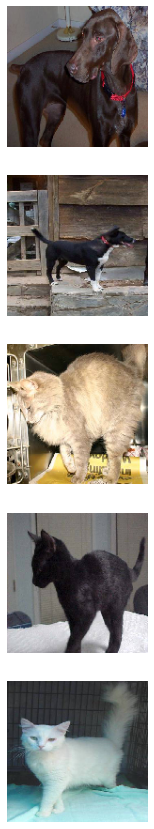

In [ ]:
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])



Since there are a small number of training examples there is a risk of overfitting. One way to fix this problem is by creating more training data from existing training examples by using random transformations.



In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255, shear_range=0.2,zoom_range=0.2,horizontal_flip=True,rotation_range=90)


A single image is plotted five different times using different variations.

Found 2000 images belonging to 2 classes.


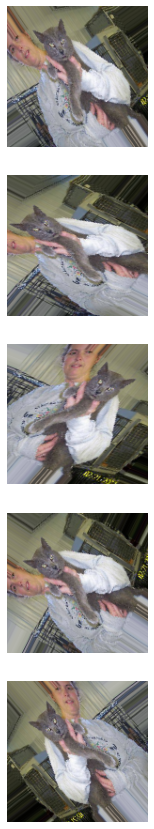

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary') ## set it to categorical if there are more than 2 classes

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

I first try with an architecture of one Conv2D and one MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.



In [ ]:
from tensorflow.python.keras.layers.core import Activation
model = Sequential()
model.add(Conv2D(16,(3,3),input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(2))


model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])




model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 module_wrapper_6 (ModuleWra  (None, 148, 148, 32)     0         
 pper)                                                           
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 175232)            0         
                                                                 
 dense_6 (Dense)             (None, 64)                11214912  
                                                                 
 module_wrapper_7 (ModuleWra  (None, 64)              

Use the `fit` method on your `model` to train the network. Make sure to pass in arguments for `x`, `steps_per_epoch`, `epochs`, `validation_data`, and `validation_steps`.

In [ ]:
## using only 1 CNNs

history = model.fit_generator(train_data_gen, steps_per_epoch=len(train_data_gen),
	validation_data=val_data_gen, validation_steps=len(val_data_gen), epochs=epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
16/16 [==============================] - 58s 4s/step - loss: 0.6845 - accuracy: 0.5520 - val_loss: 0.7312 - val_accuracy: 0.5070
Epoch 2/15
16/16 [==============================] - 53s 3s/step - loss: 0.6853 - accuracy: 0.5535 - val_loss: 0.6610 - val_accuracy: 0.5700
Epoch 3/15
16/16 [==============================] - 54s 3s/step - loss: 0.6685 - accuracy: 0.5810 - val_loss: 0.6628 - val_accuracy: 0.5700
Epoch 4/15
16/16 [==============================] - 55s 3s/step - loss: 0.6683 - accuracy: 0.5685 - val_loss: 0.6471 - val_accuracy: 0.6110
Epoch 5/15
16/16 [==============================] - 53s 3s/step - loss: 0.6595 - accuracy: 0.5985 - val_loss: 0.6756 - val_accuracy: 0.5520
Epoch 6/15
16/16 [==============================] - 53s 3s/step - loss: 0.6623 - accuracy: 0.5875 - val_loss: 0.6612 - val_accuracy: 0.5640
Epoch 7/15
16/16 [==============================] - 53s 3s/step - loss: 0.6611 - accuracy: 0.5955 - val_loss: 0.6386 - val_accuracy: 0.6220
Epoch 8/15
16/16 [==

Now with 2 Conv2D and 2 MaxPooling2D layers and then a fully connected layer on top that is activated by a ReLU activation function.



In [ ]:
from tensorflow.python.keras.layers.core import Activation
from tensorflow.keras.optimizers import SGD
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(IMG_WIDTH, IMG_HEIGHT, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))
# compile model
opt = SGD(lr=0.001, momentum=0.9)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 75, 75, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 37, 37, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 37, 37, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 18, 18, 128)    

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
# using 2 CNNs
history = model.fit_generator(train_data_gen, steps_per_epoch=len(train_data_gen),
	validation_data=val_data_gen, validation_steps=len(val_data_gen), epochs=epochs)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
16/16 [==============================] - 122s 8s/step - loss: 0.7142 - accuracy: 0.4890 - val_loss: 0.6830 - val_accuracy: 0.5700
Epoch 2/15
16/16 [==============================] - 114s 7s/step - loss: 0.6873 - accuracy: 0.5530 - val_loss: 0.6610 - val_accuracy: 0.6220
Epoch 3/15
16/16 [==============================] - 112s 7s/step - loss: 0.6711 - accuracy: 0.5820 - val_loss: 0.6536 - val_accuracy: 0.6260
Epoch 4/15
16/16 [==============================] - 112s 7s/step - loss: 0.6668 - accuracy: 0.5815 - val_loss: 0.6590 - val_accuracy: 0.6030
Epoch 5/15
16/16 [==============================] - 112s 7s/step - loss: 0.6671 - accuracy: 0.5900 - val_loss: 0.7073 - val_accuracy: 0.5230
Epoch 6/15
16/16 [==============================] - 112s 7s/step - loss: 0.6789 - accuracy: 0.5515 - val_loss: 0.6386 - val_accuracy: 0.6620
Epoch 7/15
16/16 [==============================] - 112s 7s/step - loss: 0.6523 - accuracy: 0.6035 - val_loss: 0.6329 - val_accuracy: 0.6500
Epoch 8/15
16

Visualizing the accuracy and loss of the model.

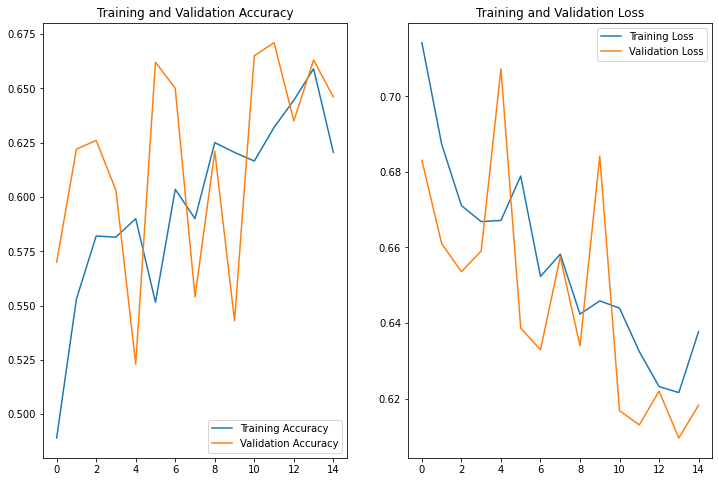

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Now I use my model to predict whether a brand new image is a cat or a dog.


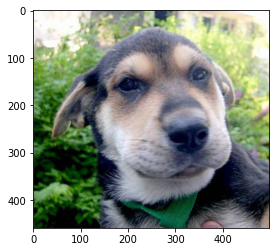

The model predicted a dog!


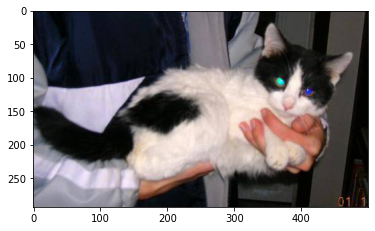

The model predicted a dog!


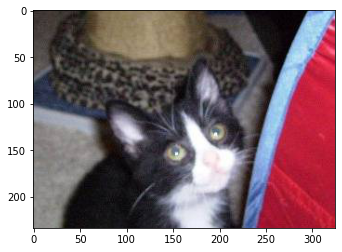

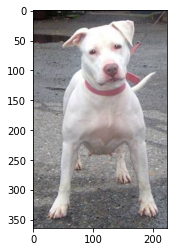

The model predicted a dog!


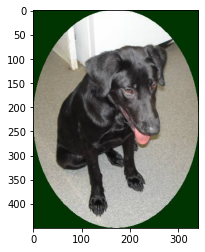

The model predicted a dog!


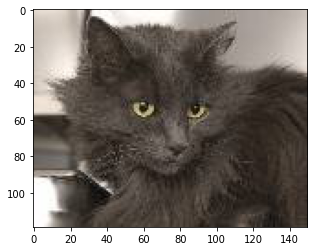

The model predicted a cat!


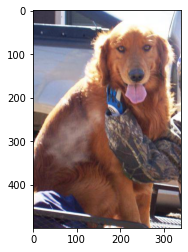

The model predicted a dog!


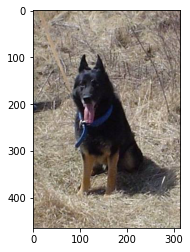

The model predicted a dog!


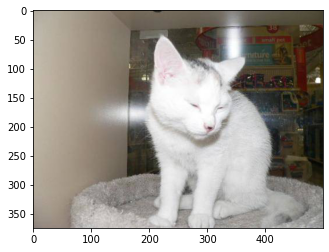

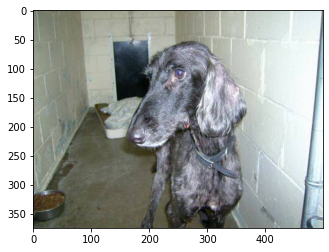

The model predicted a dog!


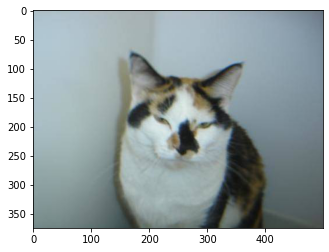

The model predicted a dog!


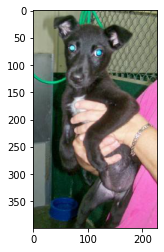

The model predicted a dog!


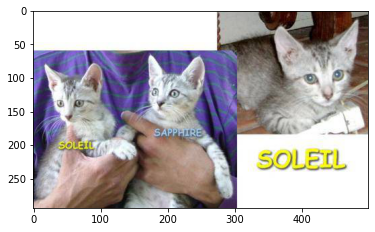

The model predicted a dog!


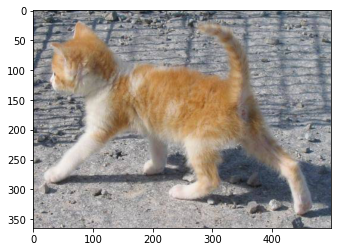

The model predicted a dog!


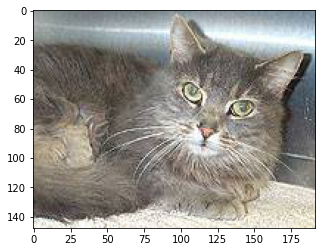

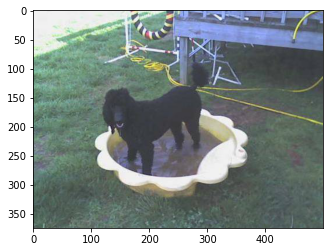

The model predicted a dog!


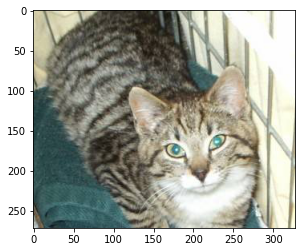

The model predicted a dog!


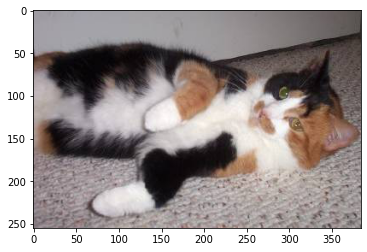

The model predicted a dog!


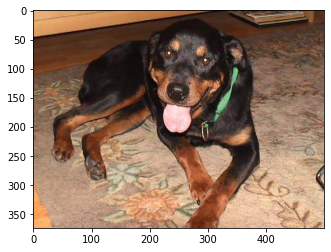

The model predicted a dog!


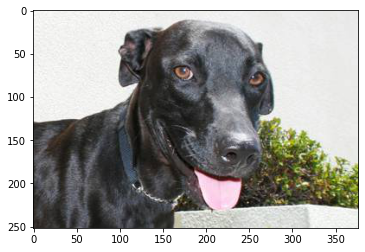

The model predicted a dog!


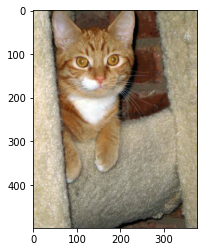

The model predicted a dog!


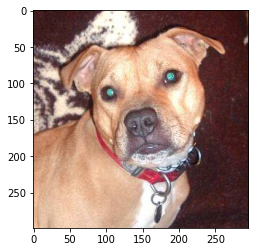

The model predicted a dog!


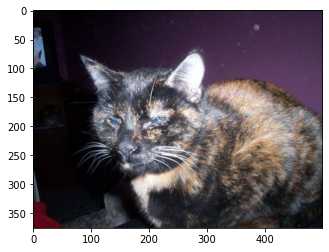

The model predicted a dog!


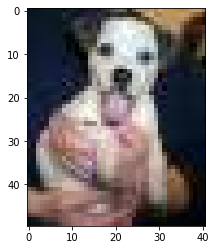

The model predicted a cat!


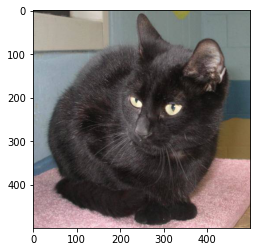

The model predicted a cat!


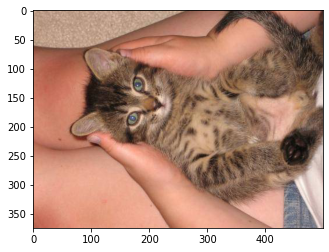

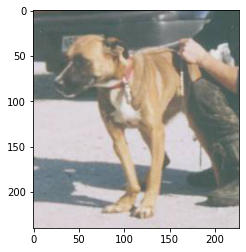

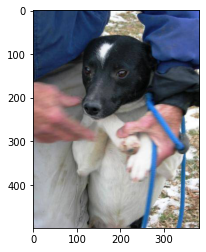

The model predicted a dog!


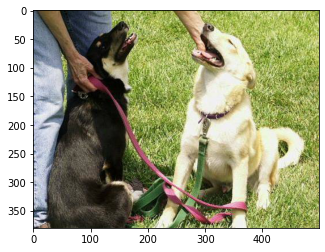

The model predicted a dog!


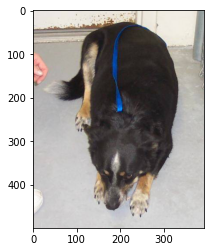

The model predicted a dog!


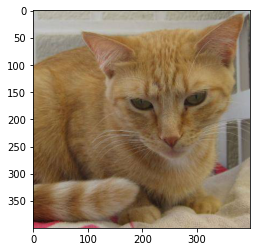

The model predicted a dog!


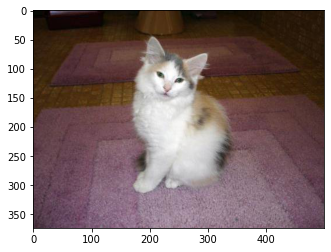

The model predicted a cat!


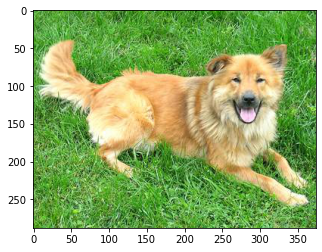

The model predicted a dog!


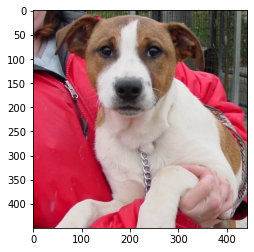

The model predicted a cat!


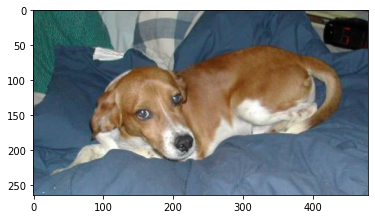

The model predicted a dog!


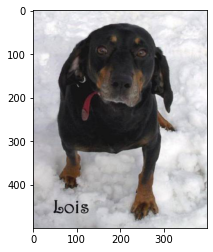

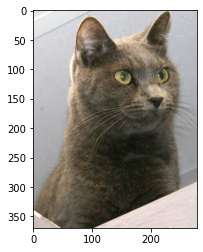

The model predicted a cat!


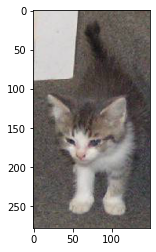

The model predicted a dog!


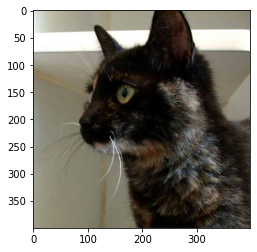

The model predicted a dog!


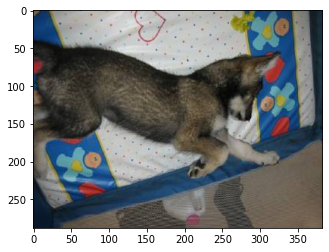

The model predicted a dog!


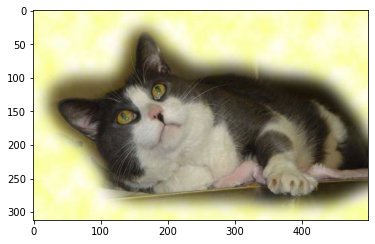

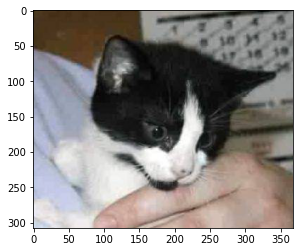

The model predicted a dog!


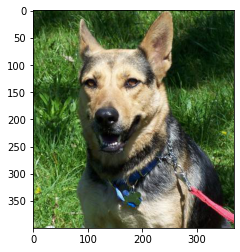

The model predicted a dog!


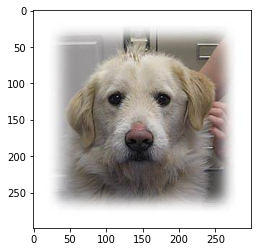

The model predicted a cat!


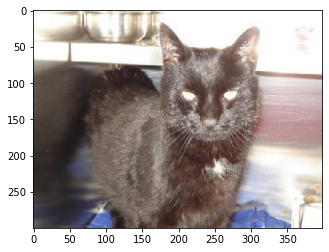

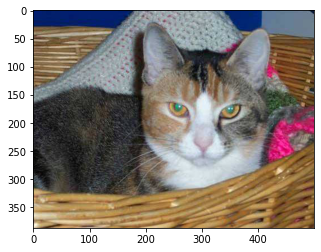

The model predicted a dog!


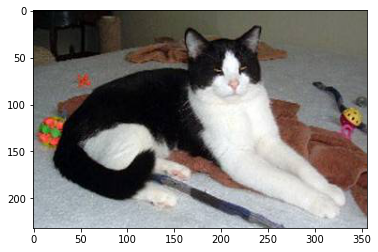

The model predicted a dog!


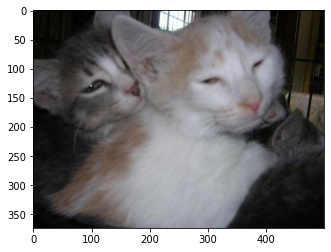

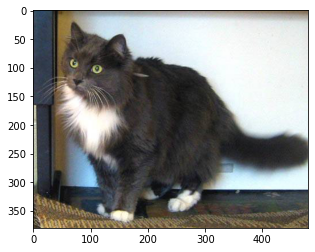

The model predicted a dog!


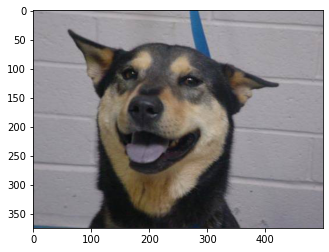

The model predicted a dog!


<Figure size 432x288 with 0 Axes>

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow import image
for imm in os.listdir(test_dir):
  if imm.endswith('jpg'):
    im = load_img('/content/cats_and_dogs/test/'+imm)
    if 'cat' in imm:
     print ('This is originally a cat!')
    if 'dog' in imm:
     print ('This is originally a dog!')
    plt.imshow(im)
    plt.show()
    X = img_to_array(im)
    X = np.expand_dims(X,axis=0)
    X = image.resize(X,[150,150])
    res = model.predict(X)
    if res == 0:
     print ('The model predicted a cat!')
    elif res == 1:
     print ('The model predicted a dog!')
    plt.clf()

In [ ]:
probabilities = model.predict_generator(test_data_gen, steps=len(test_data_gen), verbose=1)
#print('> %.3f' % (acc * 100.0))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """Entry point for launching an IPython kernel.


2/2 [==============================] - 1s 296ms/step


In [ ]:
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0,1, 1, 1, 1, 0, 1, 0, 1, 1, 
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if np.round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers))

passed_challenge = percentage_identified > 0.63

print(f"My model correctly identified {round(100*percentage_identified, 2)}% of the images of cats and dogs.")


My model correctly identified 68.0% of the images of cats and dogs
